# Introducción

# Preparación de los datos

### Instalación e importación de dependencias

In [1]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Carga de datos
Vamos a trabajar con 4 conjuntos de datos (matrices), *train_images*, *train_labels*, *test_images*, *test_labels*, para trabajar con un conjunto de datos para entrenar y otro para testar el modelo. Lo ideal sería dejar unos datos de validación pero a este nivel aún no lo vamos a utilizar.

Igual que pasaba con los números, la matriz train_images es una matriz de 28x28 con valores que van del 0 al 255 mientras que train_labels es una matriz que contiene los pares Clase y Tipo.

| Clase | Tipo |
|-----------|-----------|
| 0    | T-short/top     |
| 1    | Trouser     |
| 2    | Pullover     |
| 3    | Dress     |
| 4    | Coat     |
| 5    | Sandal     |
| 6    | Shirt     |
| 7    | Sneaker     |
| 8    | Bag     |
| 9   | Ankle boot     |



In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

`train_images = train_images.astype('float32')`

`test_images = test_images.astype('float32')`

Estas líneas convierten los datos de las imágenes de su tipo original (entero, uint8) a float32. Esto se hace porque **las operaciones en redes neuronales se realizan generalmente en números de punto flotante**, lo que permite una mayor precisión durante los cálculos y evita posibles problemas de overflow y underflow que podrían ocurrir con enteros.

In [12]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

`train_images /= 255.0`

`test_images /= 255.0`


Estas líneas realizan la normalización de los datos. Las imágenes suelen tener píxeles representados en el rango de 0 a 255. Dividir cada píxel por 255 escala estos valores a un rango de 0 a 1. Esta normalización es una práctica estándar en el procesamiento de imágenes para redes neuronales, ya que ayuda a que el proceso de entrenamiento sea más estable y rápido. Los valores normalizados son más fáciles de trabajar para la mayoría de los algoritmos de optimización utilizados en el entrenamiento de redes neuronales

In [13]:
train_images /= 255.0
test_images /= 255.0

Finalmente lo que tenemos que hacer y yo quizás peco mucho de hacer es comprobar el estado de los tensores, tipos de datos, etc.

In [14]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)


In [18]:
print("Datos train_image: ", train_images.dtype)
print("Datos train_labels: ", train_labels.dtype)

Datos train_image:  float32
Datos train_labels:  uint8


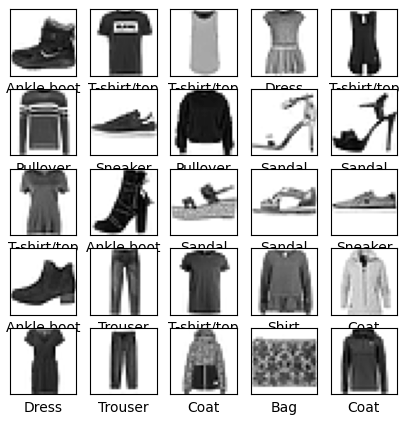

In [19]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Definición del modelo

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential() # Inicializamos el modelo secuencial que nos permite añadir capa a capa de manera manual
model.add(Flatten(input_shape=(28, 28))) # Añadimos la capa de entrada transformando la matriz de 28x28 a un vector de 784
model.add(Dense(10, activation='sigmoid')) # Añadimos una capa densa con 10 neuronas y función de activación sigmoide
model.add(Dense(10, activation='softmax')) # Añadimos una capa densa con 10 neuronas y función de activación softmax
model.summary() # Mostramos un resumen del modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Configuración del modelo

In [21]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) # Compilamos el modelo con el optimizador adam, la función de pérdida sparse_categorical_crossentropy y la métrica de accuracy

# Entrenamiento

In [24]:
model.fit(train_images, train_labels, epochs=30) # Entrenamos el modelo con los datos de entrenamiento durante 10 épocas

Epoch 1/30
1875/1875 [==============================] - 1s 315us/step - loss: 0.4466 - accuracy: 0.8457
Epoch 2/30
1875/1875 [==============================] - 1s 318us/step - loss: 0.4436 - accuracy: 0.8467
Epoch 3/30
1875/1875 [==============================] - 1s 289us/step - loss: 0.4412 - accuracy: 0.8470
Epoch 4/30
1875/1875 [==============================] - 1s 288us/step - loss: 0.4389 - accuracy: 0.8482
Epoch 5/30
1875/1875 [==============================] - 1s 289us/step - loss: 0.4365 - accuracy: 0.8489
Epoch 6/30
1875/1875 [==============================] - 1s 293us/step - loss: 0.4344 - accuracy: 0.8490
Epoch 7/30
1875/1875 [==============================] - 1s 288us/step - loss: 0.4322 - accuracy: 0.8501
Epoch 8/30
1875/1875 [==============================] - 1s 295us/step - loss: 0.4301 - accuracy: 0.8499
Epoch 9/30
1875/1875 [==============================] - 1s 290us/step - loss: 0.4282 - accuracy: 0.8504
Epoch 10/30
1875/1875 [==============================] - 1s 299u

# Evaluación y mejora

# Inferencia

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 0s 300us/step - loss: 0.4493 - accuracy: 0.8394
Accuracy:  0.8393999934196472


In [26]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 283us/step


In [28]:
predictions[5]

array([8.5638370e-04, 9.8658085e-01, 3.7492174e-04, 2.8322274e-03,
       5.4671727e-03, 1.7572538e-05, 9.8731776e-04, 2.4820480e-03,
       8.1022108e-06, 3.9348460e-04], dtype=float32)

In [29]:
predictions[5].argmax() # Devuelve el índice de la etiqueta con el valor más alto

1

Pues con el valor 1 si nos camos a la tabla de etiquetas, vemos que el modelo está prediciendo que la imagen se trata de unos pantalone:

| Clase | Tipo |
|-----------|-----------|
| 0    | T-short/top     |
| 1    | Trouser     |
| ...    | ...     |

In [30]:
test_labels[5] # Comprobamos que la predicción es correcta

1

### Evaluando el resultado
Este código simplemente nos saca m¡por pantalla una muestra de algunos datos y como se comporta el modelo prediciendo.

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#000000")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

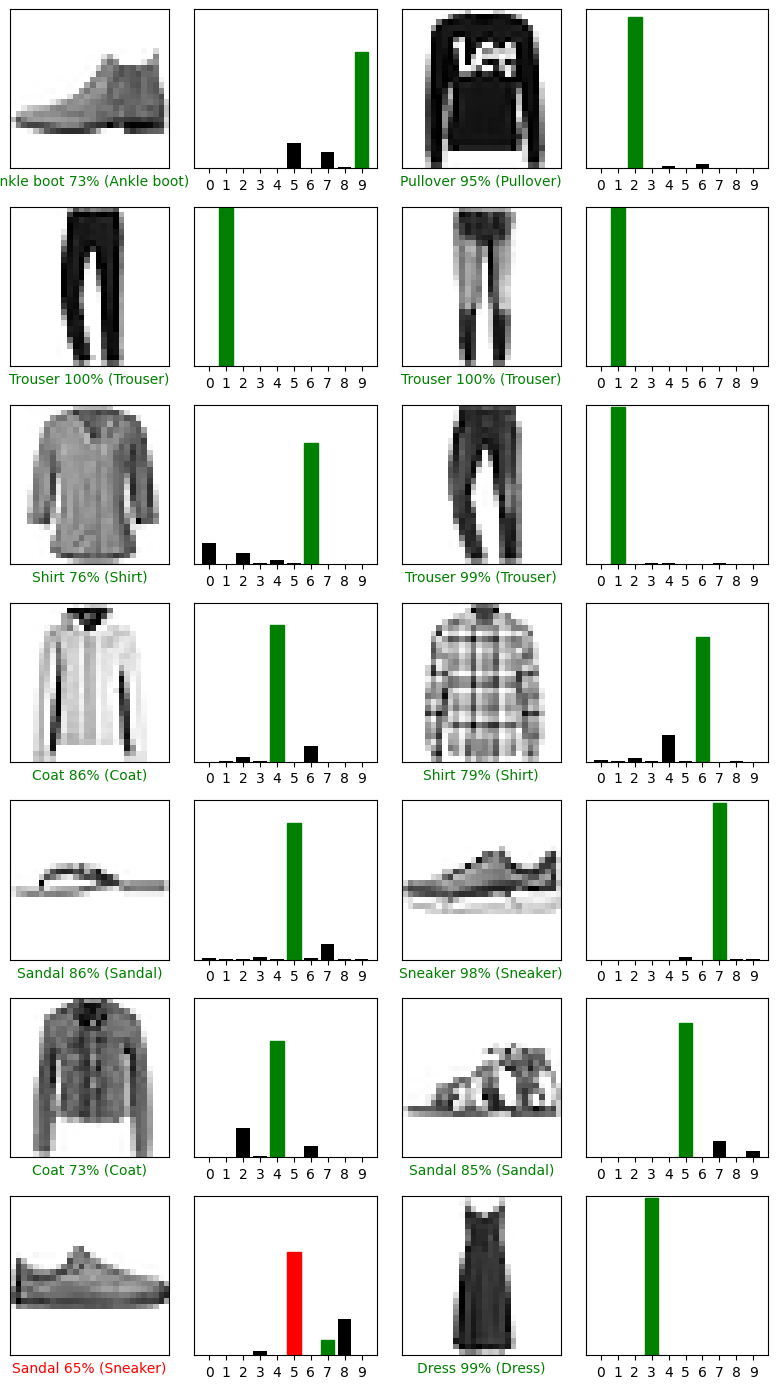

In [40]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()